# Example 11-11: Higher-order ODEs

So far we have learned that all numerical algorithms used to solve an ODE rely on the slope of the function, $dy/dt = f(t, y)$, at every time step. 
This means that the methods are limited to solving 1st-order ODEs or system of 1st-order ODEs. 
To solve 2nd-order ODEs numerically, we can get around this limitation by converting the 2nd-order ODE to a system of two 1st-order ODEs.

## Summary of commands

No new commands are demonstrated in this exercise, as it will be very similar to [Example 11-10](11-10_RK_system_demo).

## System of ODEs

Consider the following example, which represents typical oscillatory motion of a spring-mass system:

$$ \frac{d^2x}{dt^2} + \frac{1}{5} \frac{dx}{dt} + x = \sin(t/2); \quad x(0) = 7, \quad x'(0) = 5 $$

If we define $y_1(t) = x(t)$ and $y_2(t) = x'(t)$, then the transformation gives us:

$$ \begin{align*}
y'_1 &= y_2 \\
y'_2 &= -0.2 y_2 - y_1 + \sin(0.5 t)
\end{align*} $$

which allows us to apply Heun's algorithm.

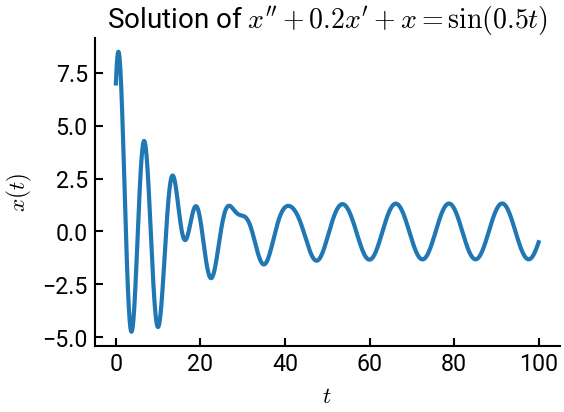

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# ODE function
def my_func(t, y):
    yp1 = y[1]
    yp2 = -0.2 * y[1] - y[0] + np.sin(0.5 * t)
    return np.array([yp1, yp2])

# Heun's method function
def heun(f, t0, tf, y0, h):
    t = np.arange(t0, tf+h, h)
    y = np.zeros([len(t), len(y0)])
    y[0, :] = y0
    for n in range(len(t) - 1):
        k1 = f(t[n], y[n, :])
        k2 = f(t[n] + h, y[n, :] + h * k1)
        y[n+1, :] = y[n, :] + 0.5 * h * (k1 + k2)
    return t, y

# initialization
t0 = 0
tf = 100
h = 0.05
y0 = 7
yp0 = 5

# solve ODE
t, y = heun(my_func, t0, tf, [y0, yp0], h)

# plot results
fig, ax = plt.subplots()
ax.plot(t, y[:, 0], lw=3)   # just the first column contains the position
ax.set(xlabel="$t$", ylabel="$x(t)$", title=r"Solution of $x'' + 0.2x' + x = \sin(0.5 t)$")
plt.show()